### Plot the figures in the main page

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import json
#script_dir = osp.realpath(__file__)
js_f = osp.normpath(osp.join("../aly","feat_dict.json"))
with open(js_f, 'r') as infile:
    feat_dict = json.load(infile)
feat_col = feat_dict['norm_onehot_feats'][0:8]
feat_col.append('ltt_shape_cat')
feat_col.append('gamma_cat')

In [3]:
feat_col1 = []
for item in feat_col:
    if 'norm' in item:
        temp = item[0:-5]
        if 'R0' in temp:
            feat_col1.append('R0')
        else:
            feat_col1.append(temp)
    else:
        feat_col1.append(item)

### Permutation Importance

In [4]:
#6 models in main text
Models = ['RF','MLP','TabNet','DeepDynaTree-GCN','DeepDynaTree-GAT','DeepDynaTree-PDGLSTM']
model_file = ['rf','mlp','tabnet','gcn','gat','pdglstm']

In [6]:
#pdglstm only
Models = ['DeepDynaTree-PDGLSTM']
model_file = ['pdglstm']

In [9]:
import csv

pmt_df = pd.DataFrame(columns=['Node Features','Models','reduced_acc','reduced_balance_acc','reduced_f1_weighted','reduced_f1_macro','reduced_brier_score','reduced_cross_entropy','reduced_macro_auc','reduced_weighted_auc'])
i = -1
j = 0
for model in model_file:
    print(model)
    i += 1
    with open(f"../test/{model}50/None-test.csv") as f:
        r = csv.reader(f)
        for row in r:
            if model in ['lr','rf','xgb']:
                ref = np.array(row[0:-2])
            else:
                if model in ['transet','deepset','tabnet']:
                    ref = np.array(row[1:7]+row[9:-2])
                else:
                    ref = np.array(row[1:7]+row[9:-2])
            ref = ref.astype(float)
            break
    k = 0
    for feat in feat_col:
        title = [feat_col1[k],Models[i]]
        k += 1
        with open(f"../test/{model}50/{feat}-test.csv") as f:
            r = csv.reader(f)
            for row in r:
                if model in ['lr','rf','xgb']:
                    record = np.array(row[0:-2])
                else:
                    if model in ['transet','deepset','tabnet']:
                        record = np.array(row[1:7]+row[9:-2])
                    else:
                        record = np.array(row[1:7]+row[9:-2])
                record = record.astype(float)
                record = title+list(abs(record-ref)/ref[1])
                pmt_df.loc[j] = record
                j += 1

rf
mlp
tabnet
gcn
gat
pdglstm


In [10]:
ref[1]

0.8293

In [11]:
pmt_df

,Node Features,Models,reduced_acc,reduced_balance_acc,reduced_f1_weighted,reduced_f1_macro,reduced_brier_score,reduced_cross_entropy,reduced_macro_auc,reduced_weighted_auc
0,oster,RF,0.032405,0.123598,0.034245,0.003578,0.070341,0.087606,0.095214,0.067241
1,oster,RF,0.031793,0.126582,0.033633,0.002073,0.070946,0.088537,0.097245,0.068251
2,oster,RF,0.029041,0.130887,0.031718,0.001091,0.070901,0.088285,0.098361,0.067774
3,oster,RF,0.031848,0.125949,0.033865,0.002243,0.070723,0.088216,0.097061,0.067602
4,oster,RF,0.031458,0.129099,0.033748,0.000566,0.070601,0.087924,0.097310,0.067163
...,...,...,...,...,...,...,...,...,...,...
2995,gamma_cat,DeepDynaTree-PDGLSTM,0.002171,0.000241,0.001688,0.001447,0.002171,0.002653,0.000121,0.000000
2996,gamma_cat,DeepDynaTree-PDGLSTM,0.002171,0.000482,0.001688,0.001447,0.002050,0.002653,0.000121,0.000121
2997,gamma_cat,DeepDynaTree-PDGLSTM,0.001568,0.000965,0.001206,0.000603,0.001809,0.002050,0.000000,0.000000
2998,gamma_cat,DeepDynaTree-PDGLSTM,0.002532,0.000844,0.001929,0.001809,0.002291,0.003015,0.000241,0.000241


In [12]:
feat_col

['oster-norm',
 'PD-norm',
 'abs_growth_rate-norm',
 'fraction_time_growth-norm',
 'r_max-norm',
 'cherries-norm',
 'BLD-norm',
 'R0-norm',
 'ltt_shape_cat',
 'gamma_cat']

In [13]:
feat_dict = {'gamma_cat':r'$\gamma$', 
             'oster':'Oster', 
             'PD':'PD', 
             'R0':r'$R_0$',
             'abs_growth_rate':'Abs Growth Rate',
             'fraction_time_growth':'Fraction Time Growth',
             'r_max':r'$R_{max}$',
             'ltt_shape_cat':'LTT Shape',
             'cherries':'Cherries',
             'BLD':'BLD' }

In [14]:
pmt_df['Node Features'] = pmt_df['Node Features'].map(feat_dict)

In [15]:
set(pmt_df['Node Features'].values)

{'$R_0$',
 '$R_{max}$',
 '$\\gamma$',
 'Abs Growth Rate',
 'BLD',
 'Cherries',
 'Fraction Time Growth',
 'LTT Shape',
 'Oster',
 'PD'}

In [16]:
order_df = pd.DataFrame(columns=['feat','value'])
i = 0
for feat in set(pmt_df['Node Features'].values):
    a = sum(pmt_df[pmt_df['Node Features']==feat]['reduced_balance_acc'].values)
    order_df.loc[i] = [feat,a]
    i += 1
order_df

,feat,value
0,Fraction Time Growth,0.676114
1,Oster,40.746657
2,$\gamma$,0.562020
3,BLD,1.447954
4,Abs Growth Rate,0.058363
5,$R_{max}$,0.957333
6,Cherries,2.539915
7,PD,23.683173
8,$R_0$,0.541759
9,LTT Shape,0.501943


In [17]:
order_df.sort_values("value",ascending=False)

,feat,value
1,Oster,40.746657
7,PD,23.683173
6,Cherries,2.539915
3,BLD,1.447954
5,$R_{max}$,0.957333
0,Fraction Time Growth,0.676114
2,$\gamma$,0.562020
8,$R_0$,0.541759
9,LTT Shape,0.501943
4,Abs Growth Rate,0.058363


In [18]:
order = list(order_df.sort_values("value",ascending=False)['feat'].values)

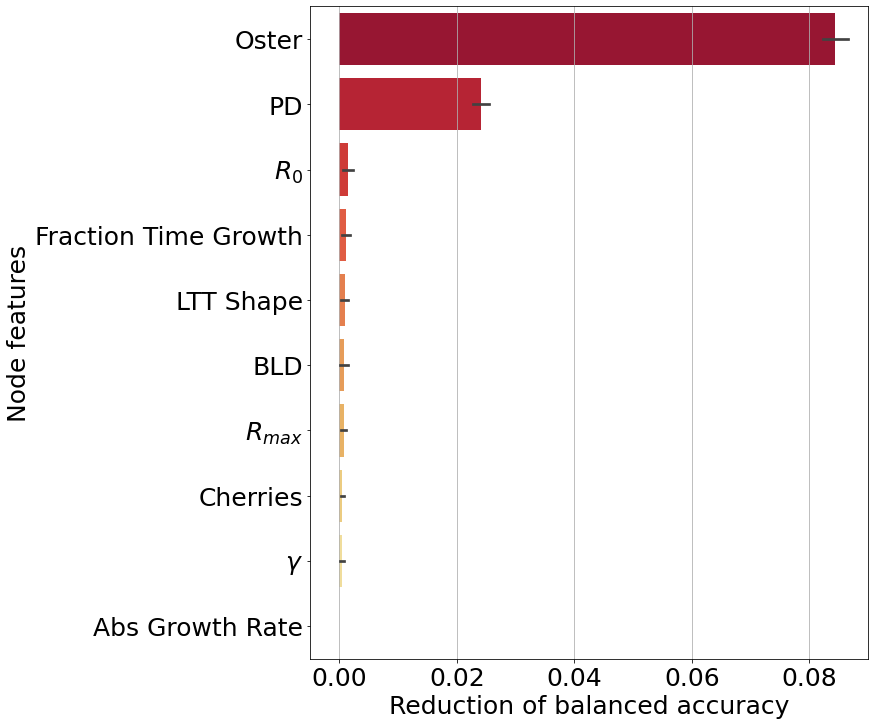

In [18]:
fig1 = plt.figure(figsize=(10,12))
plt.rcParams.update({'font.size': 25})
ax = sns.barplot(y="Node Features",x="reduced_balance_acc",  data=pmt_df, order=order, hue_order=order, ci='sd',palette=sns.color_palette('YlOrRd_r',len(order)))
ax.set_xlim(-.005,.09)
plt.grid(axis="x")
#plt.xticks(rotation=70)
plt.ylabel('Node features',fontsize=25)
plt.xlabel('Reduction of balanced accuracy',fontsize=25)
plt.show()
#fig1.savefig('../paper/pdglstm_feat.eps',dpi=1200,format='eps',bbox_inches='tight',pad_inches=0.0)

In [19]:
for feat in set(pmt_df['Node Features'].values):
    print(feat)
    print(sum(pmt_df[pmt_df['Node Features']==feat]['reduced_balance_acc'].values))

Fraction Time Growth
0.6761142645086186
Oster
40.74665728927383
$\gamma$
0.5620202816617593
BLD
1.4479539544408921
Abs Growth Rate
0.058362584573432866
$R_{max}$
0.9573332265694844
Cherries
2.5399152778837935
PD
23.68317334081646
$R_0$
0.5417591201788861
LTT Shape
0.5019428627460218


In [20]:
A = pmt_df[pmt_df.Models==Models[5]]

In [21]:
sum(A[A["Node Features"]=='PD']['reduced_balance_acc'].values)/50

0.02416013505365976

D:\Downloads\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


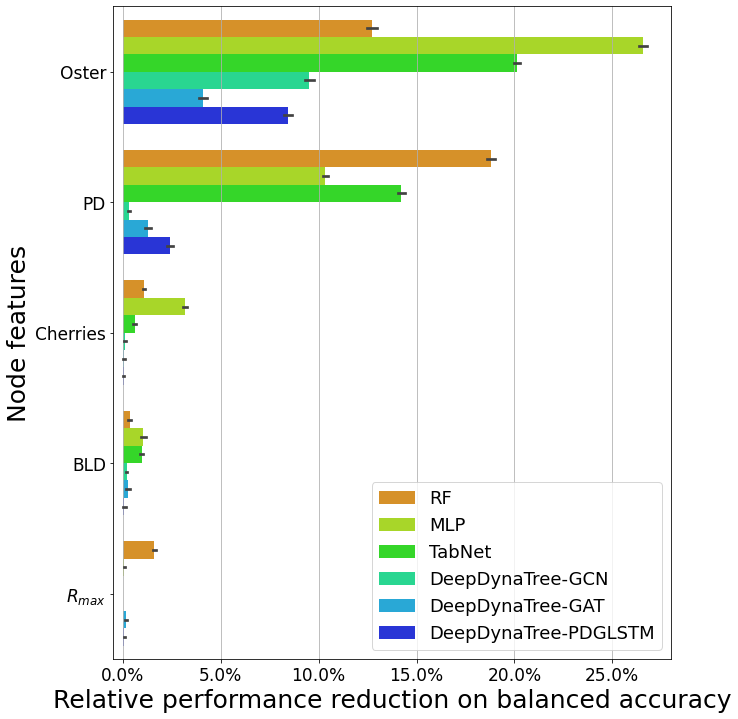

In [22]:
from matplotlib import ticker
df1 = pmt_df[pmt_df["Node Features"]=='$R_{max}$']
df1.loc[df1["Node Features"]=='$R_{max}$',"Node Features"] = '$R_{max}$'
#df1.loc[df1["Node Features"]=="v_sampling_fraction","Node Features"] = 'Sampling Fraction'
for feat in ["BLD","Cherries","PD","Oster"]:
    df = pmt_df[pmt_df["Node Features"]==feat]
    if feat in ["v_cluster_size"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Cluster Size'
    if feat in ["v_timespan"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Time Span'
    if feat in ["Oster"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Oster'
    if feat in ["Cherries"]:
        df.loc[df["Node Features"]==feat,"Node Features"] = 'Cherries'
    df1 = pd.concat([df,df1],axis=0,ignore_index=True)

fig1 = plt.figure(figsize=(10,12))
plt.rcParams.update({'font.size': 17})
ax = sns.barplot(y="Node Features",x="reduced_balance_acc",hue = "Models",ci='sd',data=df1,palette=sns.hls_palette(9, h=.1, l=.5, s=.9))
ax.set_xlim(-.005,.28)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=1))
plt.legend(loc=4,fontsize=18)
plt.grid(axis="x")
#plt.xticks(rotation=70)
plt.ylabel('Node features',fontsize=25)
plt.xlabel('Relative performance reduction on balanced accuracy',fontsize=25)
plt.show()
#fig1.savefig('../paper/impt.svg',dpi=1200, format='svg',bbox_inches='tight')


In [23]:
df1

,Node Features,Models,reduced_acc,reduced_balance_acc,reduced_f1_weighted,reduced_f1_macro,reduced_brier_score,reduced_cross_entropy,reduced_macro_auc,reduced_weighted_auc
0,Oster,RF,0.032405,0.123598,0.034245,0.003578,0.070341,0.087606,0.095214,0.067241
1,Oster,RF,0.031793,0.126582,0.033633,0.002073,0.070946,0.088537,0.097245,0.068251
2,Oster,RF,0.029041,0.130887,0.031718,0.001091,0.070901,0.088285,0.098361,0.067774
3,Oster,RF,0.031848,0.125949,0.033865,0.002243,0.070723,0.088216,0.097061,0.067602
4,Oster,RF,0.031458,0.129099,0.033748,0.000566,0.070601,0.087924,0.097310,0.067163
...,...,...,...,...,...,...,...,...,...,...
1495,$R_{max}$,DeepDynaTree-PDGLSTM,0.000241,0.000482,0.000241,0.000603,0.000121,0.000362,0.000241,0.000121
1496,$R_{max}$,DeepDynaTree-PDGLSTM,0.000482,0.000121,0.000362,0.000482,0.000241,0.000241,0.000121,0.000121
1497,$R_{max}$,DeepDynaTree-PDGLSTM,0.000482,0.000603,0.000362,0.000603,0.000241,0.000362,0.000241,0.000000
1498,$R_{max}$,DeepDynaTree-PDGLSTM,0.000603,0.001206,0.000482,0.000844,0.000482,0.000603,0.000241,0.000121


### ROC curve

In [24]:
area=['0.745','0.618','0.661','0.842','0.860','0.934']

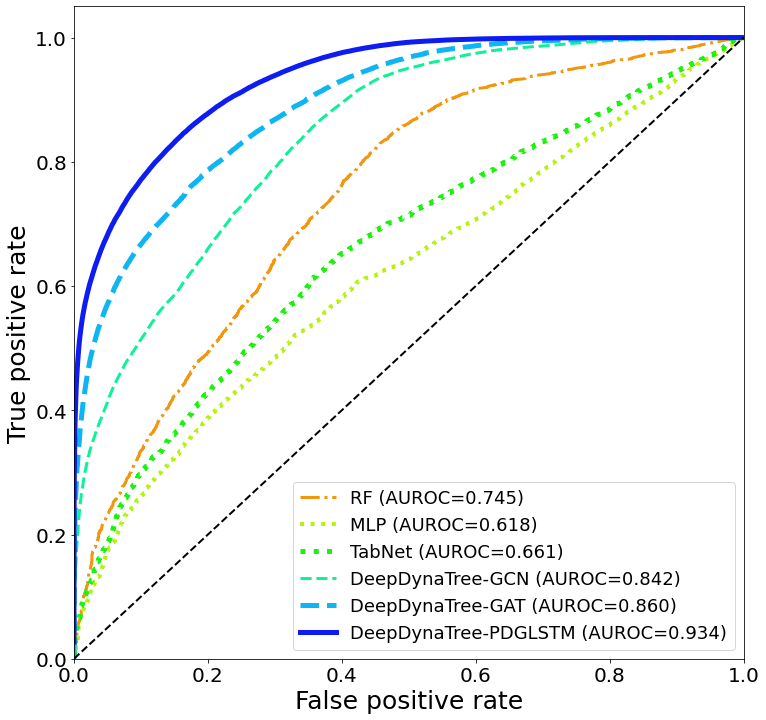

In [27]:
from itertools import cycle
from matplotlib.colors import ListedColormap
fig2 = plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 20})
i = 0
ltype = ['-.',':', ':','--','--']
lw = [3,4,5,3,5]
my_cmap = sns.hls_palette(9, h=.1, l=.5, s=.9)
for model,color in zip(model_file,my_cmap):
    roc = pd.read_csv(f"../test/ROC/roc_{model}.csv")
    fpr = roc["fpr"]
    tpr = roc["tpr"]
    if model == 'pdglstm':
        plt.plot(fpr, tpr,'-',
                 label=f"{Models[i]} (AUROC={area[i]})",
                 color=color,linewidth=5)
    else:
        plt.plot(fpr, tpr,ltype[i],
                 label=f"{Models[i]} (AUROC={area[i]})",
                 color=color, linewidth=lw[i])
    i += 1

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate',fontsize=25)
plt.ylabel('True positive rate',fontsize=25)
#plt.title('Macro-Average Receiver Operating Characteristic Curves')
plt.legend(loc="lower right",fontsize=18)
plt.show()
#fig2.savefig('../paper/roc.svg',dpi=600,format='svg')

### Confusion matrix

In [6]:
labels = ['Static','Decay','Growth']
cm_Models = ['RF','MLP','TabNet','DeepDynaTree-GCN','DeepDynaTree-GAT','DeepDynaTree-PDGLSTM']
cm_model_file = ['rf','mlp','tabnet','gcn','gat','pdglstm']

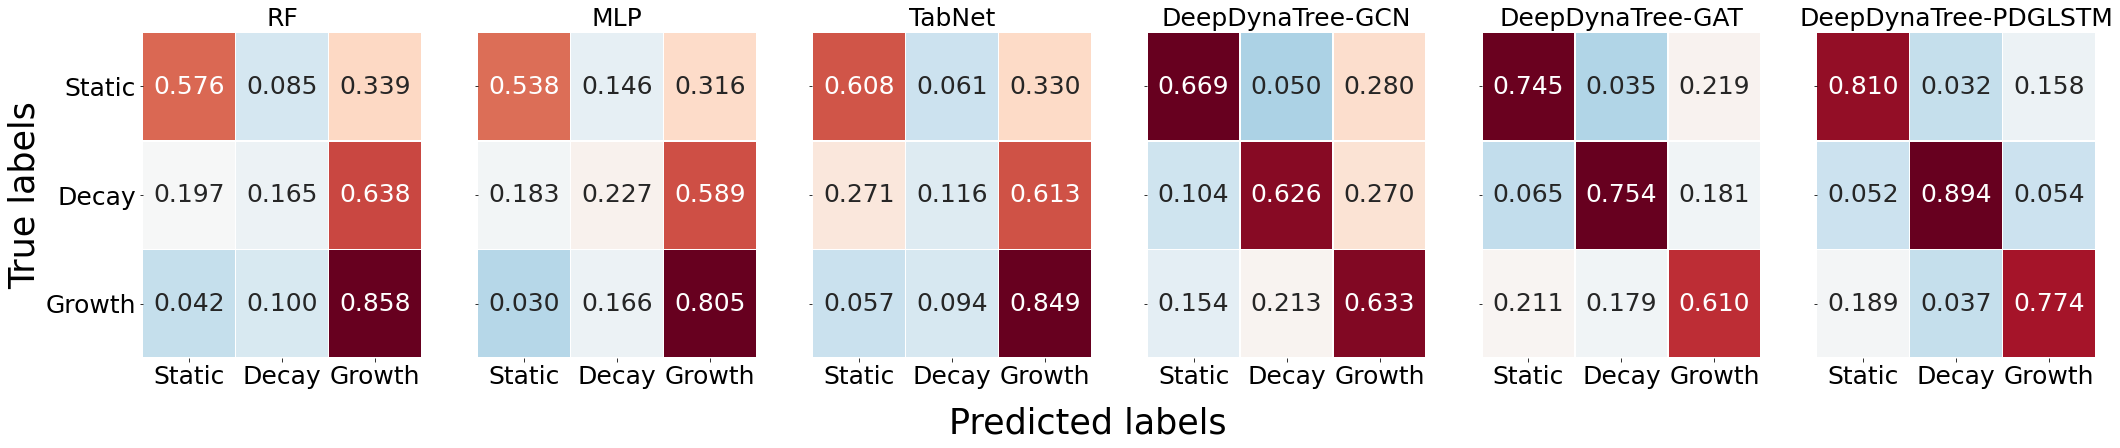

In [9]:
from sklearn.metrics import confusion_matrix
i=0
rdgn = sns.diverging_palette(h_neg=110, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
fig3, ax = plt.subplots(1,6, sharex=True, sharey=True,figsize=(35,6))
plt.rcParams.update({'font.size': 25})
for model,(i,axi) in zip(cm_model_file,enumerate(ax.flat)):
    cm = pd.read_csv(f"../test/cm/cm_{model}.csv")
    y_test_arr = cm["true"]
    y_test_pred = cm["predict"]
    conf_mat = confusion_matrix(y_test_arr, y_test_pred, normalize="true")
    
    sns.heatmap(conf_mat, center=0.2,annot=True, fmt=".3f", linewidths=.5, cmap='RdBu_r', ax=axi, cbar=False,annot_kws={"fontsize":25})
    

    axi.set_xticklabels(labels, fontsize=25)
    axi.set_yticklabels(labels, fontsize=25)
    plt.setp(axi.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
    axi.set_title(cm_Models[i],fontsize=25)
    i += 1
    # Rotate the tick labels and set their alignment.
ax[0].set_ylabel('True labels', fontsize=35)

#ax[4].set_xlabel('Predicted labels', fontsize=25)
fig3.text(0.5,-0.05,'Predicted labels', ha='center',fontsize=35)
fig3.savefig('../paper/cm.svg',dpi=600, bbox_inches='tight', pad_inches=1, format='svg',)
plt.show()

## Model limitation analysis

In [31]:
cor_org_df = pd.read_csv(f'../test/mis_aly/cor_org.csv')
cor_org_df = cor_org_df[cor_org_df['label'] != 3]
cor_org_df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,0.250000,0.5,0.382168,1,1,1.401663,4.563859,-1.663454
1,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,0.357143,1.0,3.662467,0,0,2.848432,2.339342,-0.351599
2,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,0.250000,0.5,0.382168,1,1,1.467515,4.631196,-1.816693
3,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,0.357143,1.0,3.662467,0,0,4.320158,0.551268,-0.165998
4,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,0.357143,1.0,3.662467,0,0,3.198064,1.296489,0.371324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309675,9981.0,6.0,0.596710,20.0,6.0,6.063219,38.0,1.685572,1.000000,3.371145,0.416667,0.0,2.950551,2,2,1.470930,-0.839373,3.642333
309676,9981.0,6.0,0.596710,20.0,6.0,6.063219,38.0,1.685572,1.000000,3.371145,0.416667,0.0,2.950551,2,2,1.517141,-0.858680,3.742703
309677,9981.0,6.0,0.596710,20.0,6.0,6.063219,38.0,1.685572,1.000000,3.371145,0.416667,0.0,2.950551,2,2,1.494100,-0.911042,3.670424
309678,9981.0,6.0,0.596710,20.0,6.0,6.063219,38.0,1.685572,1.000000,3.371145,0.416667,0.0,2.950551,2,2,1.590924,-0.772302,3.656970


In [32]:
mis_org_df = pd.read_csv(f'../test/mis_aly/mis_org.csv')
mis_org_df = mis_org_df[mis_org_df['label'] != 3]
mis_org_df = mis_org_df.reset_index(drop=True)
mis_org_df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,10004.0,4.0,0.904261,5.0,19.0,19.018518,144.0,3.312216,1.000000,22.647715,0.285714,0.0,3.769903,0,2,1.552353,1.100418,2.215844
1,10004.0,6.0,0.427006,31.0,9.0,9.041096,56.0,4.936828,0.333333,9.022232,0.230769,-0.5,1.883688,2,0,2.116122,0.788403,2.065781
2,10004.0,5.0,0.283943,18.0,12.0,12.049383,53.0,45.352684,0.000000,45.997120,0.200000,3.5,1.883688,0,1,1.097685,2.925617,0.827146
3,10004.0,5.0,0.283943,18.0,12.0,12.049383,53.0,45.352684,0.000000,45.997120,0.200000,3.5,1.883688,0,1,1.104468,2.916916,0.822961
4,10004.0,5.0,0.283943,18.0,12.0,12.049383,53.0,45.352684,0.000000,45.997120,0.200000,3.5,1.883688,0,1,1.094652,3.113656,0.724133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70547,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,0.400000,2.0,2.619792,0,2,1.861805,-0.075870,2.567735
70548,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,0.400000,2.0,2.619792,0,2,1.885408,-0.061639,2.792798
70549,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,0.400000,2.0,2.619792,0,2,1.929583,-0.149836,2.810551
70550,9974.0,4.0,0.914061,6.0,15.0,15.021775,77.0,1.232214,0.428571,5.217285,0.285714,-7.5,1.807446,0,1,0.842278,1.887204,1.647746


In [33]:
df = pd.concat([cor_org_df,mis_org_df],axis=0,ignore_index=True)
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0,label,pred_label,pred_score_0,pred_score_1,pred_score_2
0,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,0.250000,0.5,0.382168,1,1,1.401663,4.563859,-1.663454
1,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,0.357143,1.0,3.662467,0,0,2.848432,2.339342,-0.351599
2,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,0.250000,0.5,0.382168,1,1,1.467515,4.631196,-1.816693
3,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,0.357143,1.0,3.662467,0,0,4.320158,0.551268,-0.165998
4,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,0.357143,1.0,3.662467,0,0,3.198064,1.296489,0.371324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380227,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,0.400000,2.0,2.619792,0,2,1.861805,-0.075870,2.567735
380228,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,0.400000,2.0,2.619792,0,2,1.885408,-0.061639,2.792798
380229,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,0.400000,2.0,2.619792,0,2,1.929583,-0.149836,2.810551
380230,9974.0,4.0,0.914061,6.0,15.0,15.021775,77.0,1.232214,0.428571,5.217285,0.285714,-7.5,1.807446,0,1,0.842278,1.887204,1.647746


In [34]:
tree_ids = df['sim'].unique()
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','BLD','r_max']:
    cats, bins = pd.qcut(df[feat], 8, retbins=True, duplicates='drop',precision=2)
    cat_dict = {cat: i for i, cat in enumerate(cats.unique())}
    df[f"{feat}_bins"] = cats
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,...,pred_score_1,pred_score_2,v_sampling_fraction_bins,v_cluster_size_bins,v_timespan_bins,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins
0,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,...,4.563859,-1.663454,"(0.051, 0.38]","(84.0, 118.0]","(29.0, 34.0]","(30.01, 35.01]","(456.0, 585.0]","(0.07300000000000001, 0.25]","(0.0, 1.0]","(65.86, 106.78]"
1,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,2.339342,-0.351599,"(0.62, 0.72]","(84.0, 118.0]","(15.0, 22.0]","(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]"
2,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,...,4.631196,-1.816693,"(0.051, 0.38]","(84.0, 118.0]","(29.0, 34.0]","(30.01, 35.01]","(456.0, 585.0]","(0.07300000000000001, 0.25]","(0.0, 1.0]","(65.86, 106.78]"
3,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,0.551268,-0.165998,"(0.62, 0.72]","(84.0, 118.0]","(15.0, 22.0]","(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]"
4,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,1.296489,0.371324,"(0.62, 0.72]","(84.0, 118.0]","(15.0, 22.0]","(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380227,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,-0.075870,2.567735,"(0.62, 0.72]","(3.99, 12.0]","(7.0, 11.0]","(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]"
380228,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,-0.061639,2.792798,"(0.62, 0.72]","(3.99, 12.0]","(7.0, 11.0]","(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]"
380229,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,-0.149836,2.810551,"(0.62, 0.72]","(3.99, 12.0]","(7.0, 11.0]","(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]"
380230,9974.0,4.0,0.914061,6.0,15.0,15.021775,77.0,1.232214,0.428571,5.217285,...,1.887204,1.647746,"(0.87, 0.94]","(3.99, 12.0]","(11.0, 15.0]","(11.03, 16.02]","(47.0, 91.0]","(0.25, 0.29]","(-8.0, -2.0]","(3.95, 13.66]"


In [35]:
group_dict = {}
i = 1
for group in ['A','B','C','D','E','F','G']:
    group_dict[i] = group
    i += 1
group_dict

{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G'}

In [36]:
df['state'] = df['state_id'].apply(lambda x: group_dict[x])

In [37]:
PT_dict = {'A':0.015,'B':0.09,'C':0.11,'D':0.09,'E':0.12,'F':0.11,'G':0.11}
PT_dict

{'A': 0.015, 'B': 0.09, 'C': 0.11, 'D': 0.09, 'E': 0.12, 'F': 0.11, 'G': 0.11}

In [38]:
df['PT'] = df['state'].apply(lambda x: PT_dict[x])

In [39]:
R0_dict = {'A':2.2,'B':3.2,'C':3.9,'D':4.9,'E':4.3,'F':3.9,'G':17.8}
R0_dict

{'A': 2.2, 'B': 3.2, 'C': 3.9, 'D': 4.9, 'E': 4.3, 'F': 3.9, 'G': 17.8}

In [40]:
df['R0'] = df['state'].apply(lambda x: R0_dict[x])

In [41]:
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,...,v_cluster_size_bins,v_timespan_bins,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins,state,PT,R0
0,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,...,"(84.0, 118.0]","(29.0, 34.0]","(30.01, 35.01]","(456.0, 585.0]","(0.07300000000000001, 0.25]","(0.0, 1.0]","(65.86, 106.78]",G,0.110,17.8
1,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,"(84.0, 118.0]","(15.0, 22.0]","(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]",A,0.015,2.2
2,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,...,"(84.0, 118.0]","(29.0, 34.0]","(30.01, 35.01]","(456.0, 585.0]","(0.07300000000000001, 0.25]","(0.0, 1.0]","(65.86, 106.78]",G,0.110,17.8
3,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,"(84.0, 118.0]","(15.0, 22.0]","(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]",A,0.015,2.2
4,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,"(84.0, 118.0]","(15.0, 22.0]","(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]",A,0.015,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380227,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,"(3.99, 12.0]","(7.0, 11.0]","(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]",C,0.110,3.9
380228,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,"(3.99, 12.0]","(7.0, 11.0]","(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]",C,0.110,3.9
380229,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,"(3.99, 12.0]","(7.0, 11.0]","(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]",C,0.110,3.9
380230,9974.0,4.0,0.914061,6.0,15.0,15.021775,77.0,1.232214,0.428571,5.217285,...,"(3.99, 12.0]","(11.0, 15.0]","(11.03, 16.02]","(47.0, 91.0]","(0.25, 0.29]","(-8.0, -2.0]","(3.95, 13.66]",D,0.090,4.9


In [42]:
Init_Contact_dict = {'A':16,'B':4,'C':4,'D':6,'E':4,'F':4,'G':18}
Init_Contact_dict

{'A': 16, 'B': 4, 'C': 4, 'D': 6, 'E': 4, 'F': 4, 'G': 18}

In [43]:
df['Contact'] = df['state'].apply(lambda x: Init_Contact_dict[x])

In [44]:
label_dict = {0:'Static',1:'Decay',2:'Growth'}
label_dict

{0: 'Static', 1: 'Decay', 2: 'Growth'}

In [45]:
df['labels'] = df['label'].apply(lambda x: label_dict[x])

In [46]:
df

,sim,state_id,v_sampling_fraction,v_cluster_size,v_timespan,oster,PD,abs_growth_rate,fraction_time_growth,r_max,...,oster_bins,PD_bins,cherries_bins,BLD_bins,r_max_bins,state,PT,R0,Contact,labels
0,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,...,"(30.01, 35.01]","(456.0, 585.0]","(0.07300000000000001, 0.25]","(0.0, 1.0]","(65.86, 106.78]",G,0.110,17.8,18,Decay
1,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,"(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]",A,0.015,2.2,16,Static
2,10004.0,7.0,0.089478,105.0,34.0,34.009872,520.0,5.703092,0.125000,71.771225,...,"(30.01, 35.01]","(456.0, 585.0]","(0.07300000000000001, 0.25]","(0.0, 1.0]","(65.86, 106.78]",G,0.110,17.8,18,Decay
3,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,"(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]",A,0.015,2.2,16,Static
4,10004.0,1.0,0.637237,85.0,19.0,19.021595,150.0,1.635072,0.444444,6.972981,...,"(16.02, 24.01]","(91.0, 240.0]","(0.34, 0.38]","(0.0, 1.0]","(3.95, 13.66]",A,0.015,2.2,16,Static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380227,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,"(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]",C,0.110,3.9,4,Static
380228,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,"(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]",C,0.110,3.9,4,Static
380229,9974.0,3.0,0.637100,8.0,8.0,8.053333,27.0,0.362666,1.000000,0.857609,...,"(7.07, 11.03]","(4.99, 27.0]","(0.38, 0.5]","(1.0, 2.0]","(0.72, 3.95]",C,0.110,3.9,4,Static
380230,9974.0,4.0,0.914061,6.0,15.0,15.021775,77.0,1.232214,0.428571,5.217285,...,"(11.03, 16.02]","(47.0, 91.0]","(0.25, 0.29]","(-8.0, -2.0]","(3.95, 13.66]",D,0.090,4.9,6,Static


In [47]:
import scipy.stats
def plot_mis_aly(result_df, group_df, df, PT_df, R0_df, contact_df, label_df, y_mean,low_CI_bound,high_CI_bound,metrics):
    fig = plt.figure(figsize=(30,30))
    grid = plt.GridSpec(30,40,wspace=10,hspace=10)
    font_size=15
    degree = 60
    plt.rcParams.update({'font.size': 15})
    feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','state','PT','R0']
    feat = feat_list[0]
    plt.subplot(grid[2:9,0:12])
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Sampling Fraction',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    plt.title('a.',loc='left',fontsize=30)
    
    plt.subplot(grid[2:9,14:26])
    feat = feat_list[1]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Cluster Size',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    

    plt.subplot(grid[2:9,28:40])
    feat = feat_list[2]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy Loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Time Span',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)

    plt.subplot(grid[12:19,6:18])
    #plt.subplot(grid[12:19,0:12])
    feat = feat_list[3]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Oster',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    plt.title('b.',loc='left',fontsize=30)
    
    plt.subplot(grid[12:19,22:34])
    #plt.subplot(grid[12:19,14:26])
    feat = feat_list[4]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
    a = list(cats.unique())
    a.sort()
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('PD',fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    
    #plt.subplot(grid[21:28,28:40])
    plt.subplot(grid[22:29,0:12])
    feat = 'Contact'
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [4,6,16,18]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=contact_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Initial contact number',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    ax.set(ylim=(0, 1.15))
    plt.title('c.',loc='left',fontsize=30)
    
    #plt.subplot(grid[30:37,6:18])
    plt.subplot(grid[22:29,14:26])
    feat = feat_list[6]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [0.015,0.09,0.11,0.12]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=PT_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel('Mean P(T)',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    ax.set(ylim=(0, 1))

    #plt.subplot(grid[30:37,22:34])
    plt.subplot(grid[22:29,28:40])
    feat = feat_list[7]
    p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
    p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
    p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
    a = [2.2,3.2,3.9,4.3,4.9,17.8]
    ax = sns.boxplot(x=feat, y=feat+"_balanced_acc", data=R0_df,order=a)
    plt.legend([p1],['Average weighted cross entropy loss'],loc="upper right",fontsize=font_size,framealpha=0.5)
    plt.ylabel('Weighted cross entropy loss',fontsize=25)
    plt.xlabel(r'Initial $R_0$',fontsize=25)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=degree)
    ax.set(ylim=(0, 1.15))
    plt.show()
    fig.savefig('../paper/mis_aly.eps',dpi=1200,format='eps',bbox_inches='tight',pad_inches=0.0)

In [48]:
from collections import Counter
node_df = pd.read_csv(f'../data/06032021/split_rs123/train.csv')
node_label = node_df['dynamic'].values
label_counter = Counter(node_label)
n_samples = len(node_label)
n_classes = len(label_counter)

label_weights = [n_samples / (n_classes * label_counter[i])+1 for i in label_counter]
label_weights[-1] = 0
label_weights = label_weights[0:-1]

In [49]:
label_weights

[3.2173932609218188, 22.06635996845975, 19.276090065919227]

In [50]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, accuracy_score, f1_score, balanced_accuracy_score, brier_score_loss, log_loss, precision_score, recall_score
import torch.nn.functional as F
import torch
torch.set_default_tensor_type(torch.DoubleTensor)
num_bin = 8
def cal_auc(sub_df,feat):
    bin_list = []
    acc_list = []
    if feat in ['state','PT','R0','Contact','labels']:
        group_list = set(df[feat].values)
        for group in group_list:
            bin_list.append(group)
            subsub_df = sub_df[sub_df[feat]==group]
            y_true = subsub_df['label'].values
            y_pred = subsub_df[['pred_score_0','pred_score_1','pred_score_2']].values
            acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
            acc_list.append(acc.cpu().detach().numpy().tolist())
    else:
        cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
        for interval in cats.unique():
            bin_list.append(interval)
            subsub_df = sub_df[(sub_df[feat]>interval.left)&(sub_df[feat]<=interval.right)]
            y_true = subsub_df['label'].values
            y_pred = subsub_df[['pred_score_0','pred_score_1','pred_score_2']].values
            acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
            acc_list.append(acc.cpu().detach().numpy().tolist())
    return bin_list,acc_list

In [51]:
ls = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','BLD','r_max']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
result_df = pd.DataFrame(columns=ls)  
result_df

['v_sampling_fraction', 'v_sampling_fraction_balanced_acc', 'v_cluster_size', 'v_cluster_size_balanced_acc', 'v_timespan', 'v_timespan_balanced_acc', 'oster', 'oster_balanced_acc', 'PD', 'PD_balanced_acc', 'cherries', 'cherries_balanced_acc', 'BLD', 'BLD_balanced_acc', 'r_max', 'r_max_balanced_acc']


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc


In [52]:
num_trees = 1000
ave_acc = []
for feat in ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries','r_max']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    result_df[feat] = all_bins
    result_df[feat+'_balanced_acc'] = all_acc
    print(feat)
result_df
        

v_sampling_fraction
v_cluster_size
v_timespan
oster
PD
cherries
r_max


,v_sampling_fraction,v_sampling_fraction_balanced_acc,v_cluster_size,v_cluster_size_balanced_acc,v_timespan,v_timespan_balanced_acc,oster,oster_balanced_acc,PD,PD_balanced_acc,cherries,cherries_balanced_acc,BLD,BLD_balanced_acc,r_max,r_max_balanced_acc
0,"(0.051, 0.38]",0.587259,"(84.0, 118.0]",0.269559,"(29.0, 34.0]",0.115834,"(30.01, 35.01]",0.115478,"(456.0, 585.0]",0.164962,"(0.07300000000000001, 0.25]",0.486829,NaN,NaN,"(65.86, 106.78]",0.131023
1,"(0.62, 0.72]",0.351902,"(24.0, 41.0]",0.392568,"(15.0, 22.0]",0.437638,"(16.02, 24.01]",0.466713,"(91.0, 240.0]",0.360592,"(0.34, 0.38]",0.354497,NaN,NaN,"(3.95, 13.66]",0.480661
2,"(0.8, 0.87]",0.362308,"(65.0, 84.0]",0.166172,"(34.0, 40.0]",0.038073,"(35.01, 42.01]",0.046183,"(4.99, 27.0]",0.569495,"(0.38, 0.5]",0.505659,NaN,NaN,"(106.78, 3227464.5]",0.174370
3,"(0.38, 0.51]",0.376106,"(12.0, 24.0]",0.515388,"(1.99, 7.0]",0.567217,"(2.22, 7.07]",0.555383,"(47.0, 91.0]",0.502943,"(0.32, 0.33]",0.279699,NaN,NaN,"(0.72, 3.95]",0.524985
4,"(0.87, 0.94]",0.338563,"(3.99, 12.0]",0.690207,"(7.0, 11.0]",0.490341,"(7.07, 11.03]",0.533231,"(27.0, 47.0]",0.516721,"(0.3, 0.32]",0.213992,NaN,NaN,"(45.18, 65.86]",0.164341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,"(0.38, 0.51]",0.366043,"(12.0, 24.0]",0.533789,"(1.99, 7.0]",0.594767,"(2.22, 7.07]",0.559687,"(47.0, 91.0]",0.485512,"(0.32, 0.33]",0.343001,NaN,NaN,"(0.72, 3.95]",0.516481
1596,"(0.87, 0.94]",0.346949,"(3.99, 12.0]",0.672230,"(7.0, 11.0]",0.514227,"(7.07, 11.03]",0.516760,"(27.0, 47.0]",0.506600,"(0.3, 0.32]",0.195103,NaN,NaN,"(45.18, 65.86]",0.182235
1597,"(0.72, 0.8]",0.301759,"(41.0, 54.0]",0.229446,"(40.0, 83.0]",0.017759,"(42.01, 83.0]",0.076446,"(366.0, 456.0]",0.072162,"(0.25, 0.29]",0.365397,NaN,NaN,"(-51414230.01, 0.72]",0.580198
1598,"(0.94, 1.0]",0.338160,"(54.0, 65.0]",0.173489,"(22.0, 29.0]",0.258723,"(11.03, 16.02]",0.468378,"(240.0, 366.0]",0.232654,"(0.29, 0.3]",0.298454,NaN,NaN,"(29.9, 45.18]",0.207367


In [53]:
num_trees = 1000
ave_acc = []
for i in range(200):
    np.random.shuffle(tree_ids)
    sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
    sub_df = sub_df.reset_index(drop=True)
    y_true = sub_df['label'].values
    y_pred = sub_df[['pred_score_0','pred_score_1','pred_score_2']].values
    acc = F.cross_entropy(torch.from_numpy(y_pred), torch.from_numpy(y_true), weight=torch.tensor(label_weights), size_average=None, reduce=None, reduction='mean')
    ave_acc.append(acc.cpu().detach().numpy().tolist())

In [54]:
ls = []
for feat in ['BLD','state']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
group_df = pd.DataFrame(columns=ls)  
group_df

['BLD', 'BLD_balanced_acc', 'state', 'state_balanced_acc']


,BLD,BLD_balanced_acc,state,state_balanced_acc


In [55]:
num_trees = 1000
for feat in ['BLD','state']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    group_df[feat] = all_bins
    group_df[feat+'_balanced_acc'] = all_acc
    print(feat)
group_df

BLD
state


,BLD,BLD_balanced_acc,state,state_balanced_acc
0,"(0.0, 1.0]",0.371178,G,0.275237
1,"(2.0, 12.0]",0.485140,F,0.559437
2,"(-76.01, -8.0]",0.510965,C,0.690360
3,"(-1.0, 0.0]",0.313386,A,0.050625
4,"(1.0, 2.0]",0.307756,E,0.821073
...,...,...,...,...
1395,"(-76.01, -8.0]",0.467050,C,0.712009
1396,"(-1.0, 0.0]",0.361989,A,0.052262
1397,"(1.0, 2.0]",0.341991,E,0.801941
1398,"(-8.0, -2.0]",0.468872,D,0.915342


In [56]:
ls = []
for feat in ['PT']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
PT_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['PT']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    PT_df[feat] = all_bins
    PT_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['PT', 'PT_balanced_acc']
PT


In [57]:
ls = []
for feat in ['R0']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
R0_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['R0']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    R0_df[feat] = all_bins
    R0_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['R0', 'R0_balanced_acc']
R0


In [58]:
ls = []
for feat in ['Contact']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
contact_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['Contact']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    contact_df[feat] = all_bins
    contact_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['Contact', 'Contact_balanced_acc']
Contact


In [59]:
ls = []
for feat in ['labels']:
    ls = ls+[feat,feat+'_balanced_acc']
print(ls)
label_df = pd.DataFrame(columns=ls)  
num_trees = 1000
for feat in ['labels']:
    #plt.figure()
    all_bins = []
    all_acc = []
    for i in range(200):
        np.random.shuffle(tree_ids)
        sub_df = df[df['sim'].isin(tree_ids[0:num_trees])]
        sub_df = sub_df.reset_index(drop=True)
        bins,acc = cal_auc(sub_df,feat)
        all_bins = all_bins+bins
        all_acc = all_acc+acc
    label_df[feat] = all_bins
    label_df[feat+'_balanced_acc'] = all_acc
    print(feat)

['labels', 'labels_balanced_acc']
labels


In [60]:
import scipy.stats
feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD']
feat = feat_list[4]
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,len(result_df)-1,loc=np.mean(result_df[feat+'_balanced_acc']),
                                                   scale=scipy.stats.sem(result_df[feat+'_balanced_acc']))

In [61]:
low_CI_bound
high_CI_bound

0.32885318676103803

Text(0.5, 0, 'v_cluster_size')

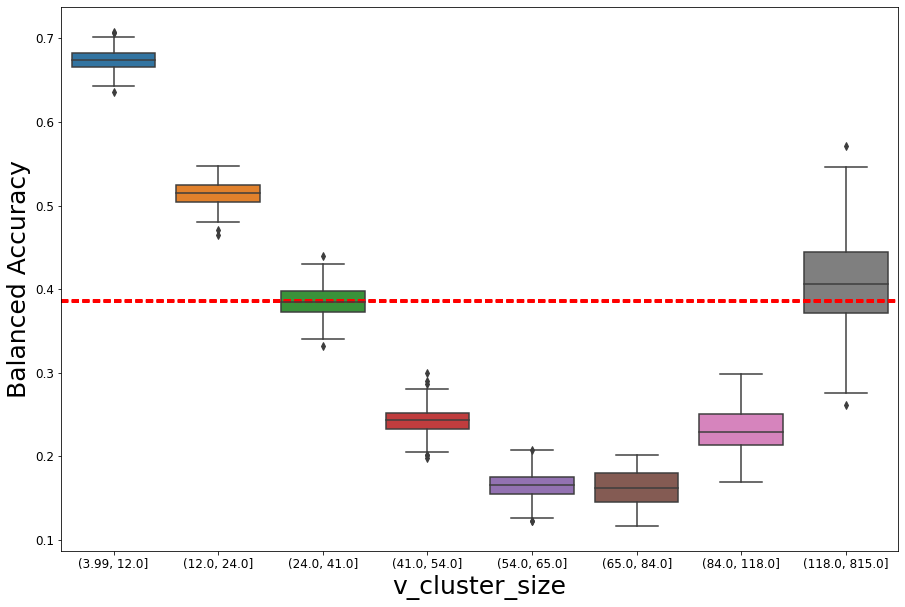

In [62]:
import scipy.stats
feat_list = ['v_sampling_fraction','v_cluster_size','v_timespan','oster','PD','cherries']
feat = feat_list[1]
#y_mean = np.mean(result_df[feat+'_balanced_acc'])
#low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,len(result_df)-1,loc=y_mean,
#                                                   scale=scipy.stats.sem(result_df[feat+'_balanced_acc']))
y_mean = np.mean(ave_acc)
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,200-1,loc=y_mean,
                                                   scale=scipy.stats.sem(ave_acc))
fig2 = plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 12})
cats, bins = pd.qcut(df[feat], num_bin, retbins=True, duplicates='drop',precision=2)
a = list(cats.unique())
a.sort()
sns.boxplot(x=feat, y=feat+"_balanced_acc", data=result_df,order=a)
p1 = plt.axhline(linewidth=2, color='r', ls='dashed', y=y_mean)
p2 = plt.axhline(linewidth=2, color='r', ls='dashed', y=low_CI_bound)
p3 = plt.axhline(linewidth=2, color='r', ls='dashed', y=high_CI_bound)
plt.ylabel('Balanced Accuracy',fontsize=25)
plt.xlabel(feat,fontsize=25)

In [63]:
len(ave_acc)

200

In [64]:
low_CI_bound

0.3845424133548034

#### Interval correction for paper

In [65]:
ref = result_df['cherries'].values[0]

In [66]:
inv = pd.Interval(left=0.073, right=0.25)

In [67]:
result_df['cherries'] = result_df['cherries'].apply(lambda x: inv if x ==ref else x)

In [68]:
ref1 = result_df['r_max'].values[2]

In [69]:
inv1 = pd.Interval(left=106.78, right=np.inf)

In [70]:
ref2 = result_df['r_max'].values[-3]

In [71]:
inv2 = pd.Interval(left=-np.inf, right=0.72)

In [72]:
result_df['r_max'] = result_df['r_max'].apply(lambda x: inv2 if x ==ref2 else x)
result_df['r_max'] = result_df['r_max'].apply(lambda x: inv1 if x ==ref1 else x)

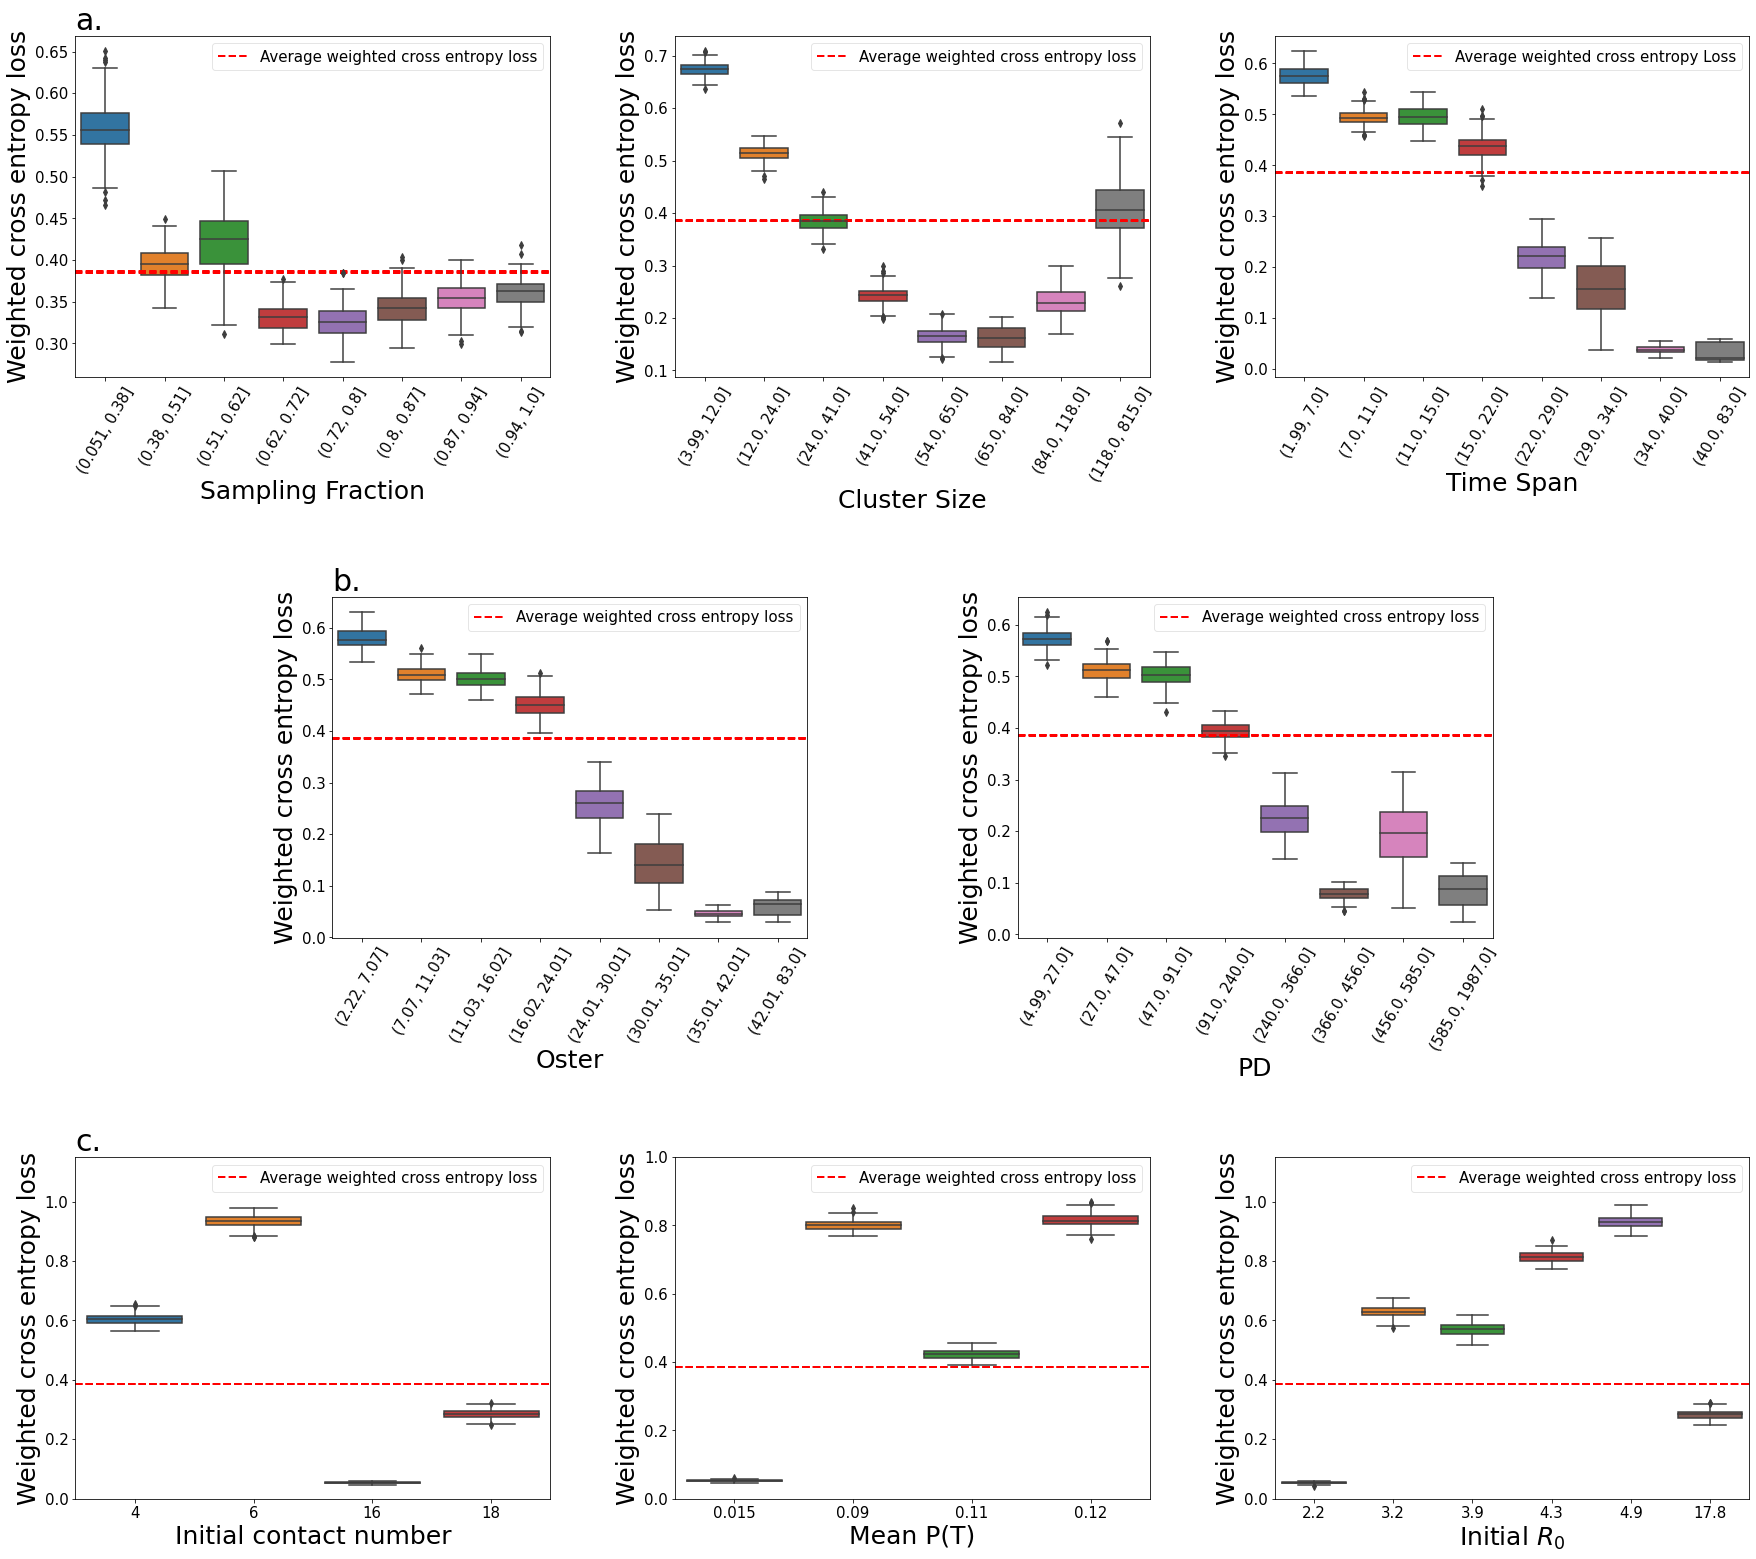

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

In [73]:
y_mean = np.mean(ave_acc)
low_CI_bound,high_CI_bound = scipy.stats.t.interval(0.95,200-1,loc=y_mean,
                                                   scale=scipy.stats.sem(ave_acc))
plot_mis_aly(result_df, group_df, df, PT_df, R0_df, contact_df, label_df, y_mean,low_CI_bound,high_CI_bound,'Balanced Acc')